In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls '/content/drive/MyDrive/CNN/Datasets/'

test/  train/


In [ ]:
train_path='/content/drive/MyDrive/CNN/Datasets/train'
valid_path='/content/drive/MyDrive/CNN/Datasets/test'

In [ ]:
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CNN/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CNN/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import Xception

In [ ]:
basemodel = Xception(weights = 'imagenet', include_top = False, input_tensor = layers.Input(shape=(224, 224, 3)))

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras import layers
for layer in basemodel.layers[:-2]:
  layers.trainable = False

In [ ]:
headmodel = basemodel.output
headmodel = layers.MaxPooling2D(pool_size = (4,4))(headmodel)
headmodel = layers.Flatten()(headmodel)
headmodel = layers.Dense(64, activation = "relu")(headmodel)
headmodel = layers.Dropout(0.3)(headmodel)
headmodel = layers.Dense(3, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(0.0005), metrics= ["accuracy"])

In [ ]:
m = model.fit(training_set, validation_data=test_set, epochs=15,verbose=1)

Epoch 1/15
81/81 [==============================] - 3237s 40s/step - loss: 0.2281 - accuracy: 0.9222 - val_loss: 0.3183 - val_accuracy: 0.9200
Epoch 2/15
81/81 [==============================] - 206s 3s/step - loss: 0.1167 - accuracy: 0.9619 - val_loss: 0.5258 - val_accuracy: 0.8455
Epoch 3/15
81/81 [==============================] - 206s 3s/step - loss: 0.0950 - accuracy: 0.9675 - val_loss: 0.1016 - val_accuracy: 0.9752
Epoch 4/15
81/81 [==============================] - 206s 3s/step - loss: 0.0705 - accuracy: 0.9782 - val_loss: 0.2498 - val_accuracy: 0.9208
Epoch 5/15
81/81 [==============================] - 207s 3s/step - loss: 0.0515 - accuracy: 0.9809 - val_loss: 0.1747 - val_accuracy: 0.9550
Epoch 6/15
81/81 [==============================] - 206s 3s/step - loss: 0.0800 - accuracy: 0.9718 - val_loss: 0.1207 - val_accuracy: 0.9697
Epoch 7/15
81/81 [==============================] - 206s 3s/step - loss: 0.0563 - accuracy: 0.9843 - val_loss: 0.4383 - val_accuracy: 0.9037
Epoch 8/15


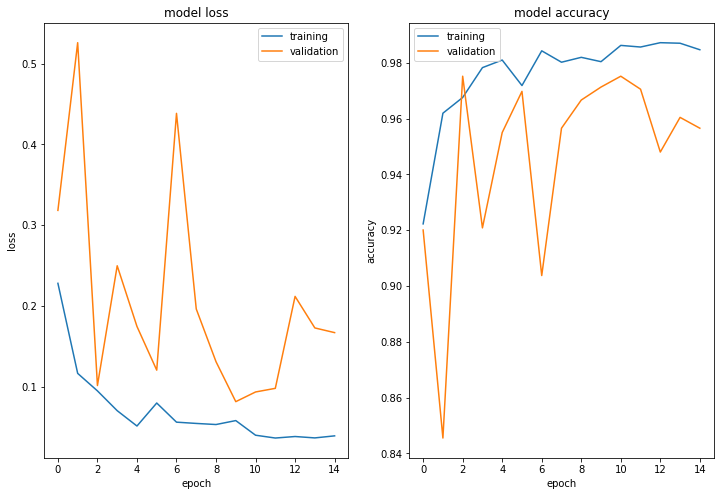

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
  
plt.subplot(1,2,2)
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')